题目：寻找关键用户和分析社交关系
data.json 数据描述
1. 用户节点数据包含用户ID和他们的"影响力分数"，格式为["用户名称", 影响力分数]。
2. 边关系数据包含每两个用户之间的连接强度（即边的权重），格式为["用户名称1", "用户名称2", 关系权重]。
例如：

节点：["Yanyan-Wang", 50.95], ["Aarebecca", 23.82], ...
边：["Yanyan-Wang", "Aarebecca", 25.3], ["Yanyan-Wang", "pomelo-nwu", 25.09], ...

1. 社交网络构建与分析
a. 使用邻接矩阵或者字典表示法来表示这个社交关系网络。
b. 请找出每个用户的直接朋友（即与其存在边关系的节点），并用列表形式列出。

In [37]:
import json


with open('.vscode/hw4_data.json','r') as file:
    data = json.load(file)

nodes = data['nodes']
edges = data['edges']

#使用字典表示法
social_network = {}
for node in nodes:
    social_network[node[0]] = {'influence_score':node[1],'friends':[]}

for edge in edges:
    user1,user2,weight = edge
    social_network[user1]['friends'].append((user2,weight))
    social_network[user2]['friends'].append((user1,weight))

print("每个用户的直接朋友：")
for user in social_network:
    friends = [friend[0] for friend in social_network[user]['friends']]
    print(f"{user}的直接朋友有：{friends}") 


每个用户的直接朋友：
Yanyan-Wang的直接朋友有：['Aarebecca', 'pomelo-nwu', 'yangzy0603', 'tyn1998', 'yvonneyx', 'lidongze0629', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'wj23027', 'frank-zsy', 'andyhuang18', 'bifenglin']
Aarebecca的直接朋友有：['Yanyan-Wang', 'pomelo-nwu', 'yangzy0603', 'yvonneyx', 'lidongze0629', 'tyn1998', 'RackweLLizm', 'yikenie', 'yubo0923', 'Maple0817', 'frank-zsy']
pomelo-nwu的直接朋友有：['Yanyan-Wang', 'Aarebecca', 'yangzy0603', 'tyn1998', 'lidongze0629', 'yvonneyx', 'RackweLLizm', 'yikenie', 'bifenglin', 'frank-zsy', 'yubo0923', 'wj23027', 'andyhuang18', 'Maple0817', 'will-ww', 'zhicheng-ning', 'PureNatural', 'xiaoya-yaya', 'xgdyp', 'longyanz', 'Zzzzzhuzhiwei', 'birdflyi', 'lhbvvvvv', 'zhaosj975']
tyn1998的直接朋友有：['andyhuang18', 'pomelo-nwu', 'frank-zsy', 'wj23027', 'bifenglin', 'Yanyan-Wang', 'will-ww', 'Zzzzzhuzhiwei', 'lhbvvvvv', 'zhicheng-ning', 'PureNatural', 'yangzy0603', 'xgdyp', 'stevending1st', 'wxharry', 'Aarebecca', 'birdflyi', 'xiaoya-yaya', 'pranavshuklaa', 'lidongze0629

2. 统计与度中心性分析
a. 计算每个用户的度数（即直接朋友数量），列出度数最多的前5个用户及其朋友数量。
b. 通过影响力分数（如上所示），找出影响力最高的前5个用户。
c. 综合考虑影响力分数和朋友数量，列出对社交网络最有影响力的用户（可以选择将两者按一定比例加权，例如影响力得分的50%和朋友数量的50%）。

In [14]:
#计算每个用户的度数
degrees = {}
for user,info in social_network.items():
    degrees[user] = len(info['friends'])
sorted_degrees = sorted(degrees.items(),key=lambda item:item[1],reverse = True)
top_5_degree_users = sorted_degrees[:5]
print("度数最多的前5个用户及其朋友数量：")
for user,degree in top_5_degree_users:
    print(f"{user}:{degree}")

#找出影响力最高的前5个用户
sorted_scores = sorted(social_network.items(),key=lambda item:item[1]['influence_score'],reverse=True)
top_5_score_users = sorted_scores[:5]
print("影响力最高的前5个用户：")
for user,influnce in top_5_score_users:
    print(f"{user} 影响力分数：{influnce['influence_score']}")

#列出对社交网络最有影响力的用户
combined_influnce = {}
for user,info in social_network.items():
    influnce_scores = info["influence_score"]
    degree = degrees[user]
    combined_influnce[user] = (influnce_scores + degree) / 2
sorted_combined = sorted(combined_influnce.items(),key=lambda item:item[1],reverse=True)
most_influential_user = sorted_combined[:5]
print("对社交网络最有影响力的用户:")
for user,influnce in most_influential_user:
    print(f"{user} 综合影响力：{influnce}")


度数最多的前5个用户及其朋友数量：
tyn1998:30
frank-zsy:30
pomelo-nwu:24
andyhuang18:23
wj23027:23
影响力最高的前5个用户：
Yanyan-Wang 影响力分数：50.95
Aarebecca 影响力分数：23.82
pomelo-nwu 影响力分数：22.36
tyn1998 影响力分数：16.64
frank-zsy 影响力分数：15.8
对社交网络最有影响力的用户:
Yanyan-Wang 综合影响力：32.475
tyn1998 综合影响力：23.32
pomelo-nwu 综合影响力：23.18
frank-zsy 综合影响力：22.9
Aarebecca 综合影响力：17.41


3. 推荐新朋友
a. 对于用户 Yanyan-Wang，请找出其“朋友的朋友”中最有可能成为新朋友的用户，并列出推荐的理由（例如有最多共同的朋友）。


In [35]:
from collections import defaultdict

Yanyan_wang_friends = social_network["Yanyan-Wang"]['friends']
Yanyan_wang_friends_of_friends = defaultdict(int)
for friend in Yanyan_wang_friends:
    for friend_friend in social_network[friend]['friends']:
        if friend_friend != 'Yanyan-Wang' and friend_friend not in Yanyan_wang_friends:
            Yanyan_wang_friends_of_friends[friend_friend] += 1

new_friends = sorted(Yanyan_wang_friends_of_friends.items(),key=lambda item:item[1],reverse=True)
print(f"推荐给Yanyan-Wang的新朋友及推荐理由:")
for user, num in new_friends:
    print(f"{user}: 有 {num} 个共同朋友")





推荐给Yanyan-Wang的新朋友及推荐理由:
will-ww: 有 6 个共同朋友
zhicheng-ning: 有 6 个共同朋友
PureNatural: 有 6 个共同朋友
xiaoya-yaya: 有 6 个共同朋友
xgdyp: 有 6 个共同朋友
longyanz: 有 6 个共同朋友
Zzzzzhuzhiwei: 有 6 个共同朋友
birdflyi: 有 6 个共同朋友
lhbvvvvv: 有 6 个共同朋友
zhaosj975: 有 6 个共同朋友
stevending1st: 有 5 个共同朋友
wxharry: 有 4 个共同朋友
pranavshuklaa: 有 4 个共同朋友
stealth-bombeer: 有 4 个共同朋友
Vlad116: 有 4 个共同朋友
kunal8411: 有 4 个共同朋友


b. 考虑用户之间的连接强度，找出与 Yanyan-Wang 连接强度最高的5个用户（无论是否已经是直接朋友），并列出推荐排序。

In [44]:
connection_strengths = defaultdict(float)

for edge in data['edges']:
    user1, user2, weight = edge
    if user1 == "Yanyan-Wang":
        connection_strengths[user2] = weight
    elif user2 == "Yanyan-Wang":
        connection_strengths[user1] = weight

# 按连接强度排序，找出强度最高的5个用户
sorted_strength = sorted(connection_strengths.items(), key=lambda item: item[1], reverse=True)
top_5_strength = sorted_strength[:5]

print(f"与Yanyan-Wang连接强度最高的前5个用户:")
for user, strength in top_5_strength:
    print(f"{user}: 连接强度 {strength}")

与Yanyan-Wang连接强度最高的前5个用户:
Aarebecca: 连接强度 25.3
pomelo-nwu: 连接强度 25.09
yangzy0603: 连接强度 11.85
tyn1998: 连接强度 9.62
yvonneyx: 连接强度 7.39


4. 网络图的可视化
a. 使用图论可视化工具绘制用户关系网络图，展示关键用户和他们的连接情况。
b. 你可以对图中的节点按“影响力得分”进行着色，节点的大小则代表度数，尝试解释在图中哪些用户在社交网络中最具影响力。

C:\Users\86188\AppData\Local\Temp\ipykernel_24740\2761776339.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis')


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

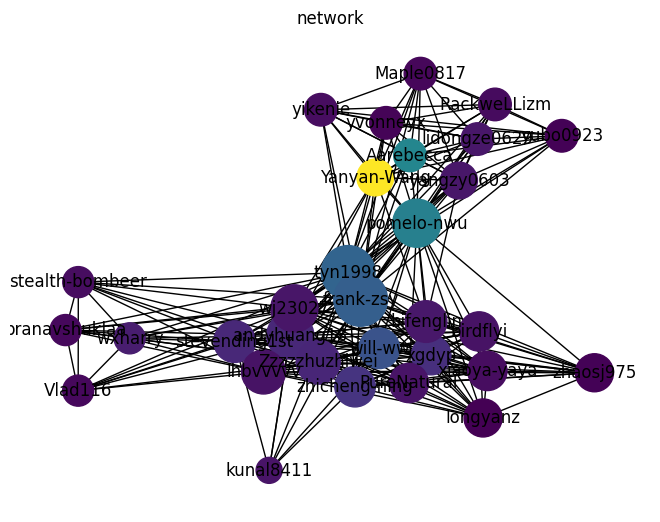

In [47]:
import networkx as nx
import matplotlib.pyplot as plt


# 创建一个空的图
G = nx.Graph()

# 添加节点和边到图中
for node in nodes:
    user_name, influence_score = node
    G.add_node(user_name, influence_score=influence_score)

for edge in edges:
    user1, user2, weight = edge
    G.add_edge(user1, user2, weight=weight)

# 计算每个用户的度数（直接朋友数量）
degrees = dict(G.degree())

# 绘制网络图
pos = nx.spring_layout(G)
node_sizes = [degrees[node] * 50 for node in G.nodes()]
influence_scores = [G.nodes[node]['influence_score'] for node in G.nodes()]

# 根据影响力得分进行着色
cmap = plt.cm.get_cmap('viridis')
colors = [influence_scores[i] / max(influence_scores) for i in range(len(G.nodes()))]
nx.draw(G, pos, node_size=node_sizes, node_color=colors, cmap=cmap, with_labels=True)

plt.title("network")
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap), label="influnce_score")
plt.show()